# YoloV5 Custom Training

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
#rm -rf /content/drive/MyDrive/yolov5

In [70]:
!nvidia-smi -L

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
GPU 0: Tesla T4 (UUID: GPU-aece9445-3a26-4758-1c99-723c12d731f3)


In [71]:
#%mkdir CUSTOMYOLOV5
%cd /content/drive/MyDrive/CUSTOMYOLOV5

/content/drive/MyDrive/CUSTOMYOLOV5


#### Clone the Github Repo

In [72]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14546, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 14546 (delta 32), reused 42 (delta 20), pack-reused 14478
Receiving objects: 100% (14546/14546), 13.72 MiB | 9.27 MiB/s, done.
Resolving deltas: 100% (10014/10014), done.
/content/drive/MyDrive/CUSTOMYOLOV5/yolov5


#### Installing requirements

In [73]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
#from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.13.0+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [82]:
%pwd

'/content/drive/MyDrive/CUSTOMYOLOV5/yolov5'

## Unzipping Dataset and Moving data.yaml

In [83]:
#For Colab
#upload dataset into yolov5 folder
#upload custom_data.yaml into yolov5/data/


#!tar -zxvf archive.tar.gz

## Checking the number of classes in our dataset

In [84]:
%cat ./data/custom_data.yaml

train: ./dataset/train/images
val: ./dataset/test/images

nc: 4
names: ['trafficlight','speedlimit','crosswalk','stop']



### from scratch
#### `python train.py --data /content/drive/MyDrive/CUSTOMYOLOV5/yolov5/data/custom_data.yaml --weights '' --cfg /content/drive/MyDrive/CUSTOMYOLOV5/yolov5/models/custom_yolov5s.yaml --img 640`

### from pretrained (recommended)
##### `python train.py --data /content/drive/MyDrive/CUSTOMYOLOV5/yolov5/data/custom_data.yaml --weights yolov5s.pt --img 640`

### From Scratch 

## # Defining number of classes

In [85]:
# import yaml
# with open("/content/drive/MyDrive/CUSTOMYOLOV5/yolov5/data/custom_data.yaml", 'r') as stream:
#     num_classes = str(yaml.safe_load(stream)['nc'])

## Model configuration for YoloV5

In [86]:
# %cat /content/drive/MyDrive/CUSTOMYOLOV5/yolov5/models/yolov5s.yaml

## Customize iPython writefile so we can write variables


In [87]:
# from IPython.core.magic import register_line_cell_magic

# @register_line_cell_magic
# def writetemplate(line, cell):
#     with open(line, 'w') as f:
#         f.write(cell.format(**globals()))

## Model Configuration for our Model

In [88]:
# %%writetemplate /content/drive/MyDrive/CUSTOMYOLOV5/yolov5/models/custom_yolov5s.yaml

# # parameters
# nc: {num_classes}  # number of classes
# depth_multiple: 0.33  # model depth multiple
# width_multiple: 0.50  # layer channel multiple

# # anchors
# anchors:
#   - [10,13, 16,30, 33,23]  # P3/8
#   - [30,61, 62,45, 59,119]  # P4/16
#   - [116,90, 156,198, 373,326]  # P5/32

# # YOLOv5 backbone
# backbone:
#   # [from, number, module, args]
#   [[-1, 1, Focus, [64, 3]],  # 0-P1/2
#    [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
#    [-1, 3, BottleneckCSP, [128]],
#    [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
#    [-1, 9, BottleneckCSP, [256]],
#    [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
#    [-1, 9, BottleneckCSP, [512]],
#    [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
#    [-1, 1, SPP, [1024, [5, 9, 13]]],
#    [-1, 3, BottleneckCSP, [1024, False]],  # 9
#   ]

# # YOLOv5 head
# head:
#   [[-1, 1, Conv, [512, 1, 1]],
#    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
#    [[-1, 6], 1, Concat, [1]],  # cat backbone P4
#    [-1, 3, BottleneckCSP, [512, False]],  # 13

#    [-1, 1, Conv, [256, 1, 1]],
#    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
#    [[-1, 4], 1, Concat, [1]],  # cat backbone P3
#    [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

#    [-1, 1, Conv, [256, 3, 2]],
#    [[-1, 14], 1, Concat, [1]],  # cat head P4
#    [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

#    [-1, 1, Conv, [512, 3, 2]],
#    [[-1, 10], 1, Concat, [1]],  # cat head P5
#    [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

#    [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
#   ]

## Doing Changes in train.py for training

In [89]:
# %%writefile /content/drive/MyDrive/YOLOV5_CUSTOM/yolov5/utils/train.py
# import argparse
# import logging
# import math
# import os
# import random
# import time
# from pathlib import Path
# from warnings import warn

# import numpy as np
# import torch.distributed as dist
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# import torch.optim.lr_scheduler as lr_scheduler
# import torch.utils.data
# import yaml
# from torch.cuda import amp
# from torch.nn.parallel import DistributedDataParallel as DDP
# from torch.utils.tensorboard import SummaryWriter
# from tqdm import tqdm

# import test  # import test.py to get mAP after each epoch
# from models.yolo import Model
# from utils.autoanchor import check_anchors
# from utils.datasets import create_dataloader
# from utils.general import labels_to_class_weights, increment_path, labels_to_image_weights, init_seeds, \
#     fitness, strip_optimizer, get_latest_run, check_dataset, check_file, check_git_status, check_img_size, \
#     print_mutation, set_logging
# from utils.google_utils import attempt_download
# from utils.loss import compute_loss
# from utils.plots import plot_images, plot_labels, plot_results, plot_evolution
# from utils.torch_utils import ModelEMA, select_device, intersect_dicts, torch_distributed_zero_first

# logger = logging.getLogger(__name__)

# try:
#     import wandb
# except ImportError:
#     wandb = None
#     logger.info("Install Weights & Biases for experiment logging via 'pip install wandb' (recommended)")


# def train(hyp, opt, device, tb_writer=None, wandb=None):
#     logger.info(f'Hyperparameters {hyp}')
#     save_dir, epochs, batch_size, total_batch_size, weights, rank = \
#         Path(opt.save_dir), opt.epochs, opt.batch_size, opt.total_batch_size, opt.weights, opt.global_rank

#     # Directories
#     wdir = save_dir / 'weights'
#     wdir.mkdir(parents=True, exist_ok=True)  # make dir
#     last = wdir / 'last.pt'
#     best = wdir / 'best.pt'
#     results_file = save_dir / 'results.txt'

#     # Save run settings
#     with open(save_dir / 'hyp.yaml', 'w') as f:
#         yaml.dump(hyp, f, sort_keys=False)
#     with open(save_dir / 'opt.yaml', 'w') as f:
#         yaml.dump(vars(opt), f, sort_keys=False)

#     # Configure
#     plots = not opt.evolve  # create plots
#     cuda = device.type != 'cpu'
#     init_seeds(2 + rank)
#     with open(opt.data) as f:
#         data_dict = yaml.load(f, Loader=yaml.FullLoader)  # data dict
#     with torch_distributed_zero_first(rank):
#         check_dataset(data_dict)  # check
#     train_path = data_dict['train']
#     test_path = data_dict['val']
#     nc, names = (1, ['item']) if opt.single_cls else (int(data_dict['nc']), data_dict['names'])  # number classes, names
#     assert len(names) == nc, '%g names found for nc=%g dataset in %s' % (len(names), nc, opt.data)  # check

#     # Model
#     pretrained = weights.endswith('.pt')
#     if pretrained:
#         with torch_distributed_zero_first(rank):
#             attempt_download(weights)  # download if not found locally
#         ckpt = torch.load(weights, map_location=device)  # load checkpoint
#         if hyp.get('anchors'):
#             ckpt['model'].yaml['anchors'] = round(hyp['anchors'])  # force autoanchor
#         model = Model(opt.cfg or ckpt['model'].yaml, ch=3, nc=nc).to(device)  # create
#         exclude = ['anchor'] if opt.cfg or hyp.get('anchors') else []  # exclude keys
#         state_dict = ckpt['model'].float().state_dict()  # to FP32
#         state_dict = intersect_dicts(state_dict, model.state_dict(), exclude=exclude)  # intersect
#         model.load_state_dict(state_dict, strict=False)  # load
#         logger.info('Transferred %g/%g items from %s' % (len(state_dict), len(model.state_dict()), weights))  # report
#     else:
#         model = Model(opt.cfg, ch=3, nc=nc).to(device)  # create

#     # Freeze
#     freeze = []  # parameter names to freeze (full or partial)
#     for k, v in model.named_parameters():
#         v.requires_grad = True  # train all layers
#         if any(x in k for x in freeze):
#             print('freezing %s' % k)
#             v.requires_grad = False

#     # Optimizer
#     nbs = 64  # nominal batch size
#     accumulate = max(round(nbs / total_batch_size), 1)  # accumulate loss before optimizing
#     hyp['weight_decay'] *= total_batch_size * accumulate / nbs  # scale weight_decay

#     pg0, pg1, pg2 = [], [], []  # optimizer parameter groups
#     for k, v in model.named_modules():
#         if hasattr(v, 'bias') and isinstance(v.bias, nn.Parameter):
#             pg2.append(v.bias)  # biases
#         if isinstance(v, nn.BatchNorm2d):
#             pg0.append(v.weight)  # no decay
#         elif hasattr(v, 'weight') and isinstance(v.weight, nn.Parameter):
#             pg1.append(v.weight)  # apply decay

#     if opt.adam:
#         optimizer = optim.Adam(pg0, lr=hyp['lr0'], betas=(hyp['momentum'], 0.999))  # adjust beta1 to momentum
#     else:
#         optimizer = optim.SGD(pg0, lr=hyp['lr0'], momentum=hyp['momentum'], nesterov=True)

#     optimizer.add_param_group({'params': pg1, 'weight_decay': hyp['weight_decay']})  # add pg1 with weight_decay
#     optimizer.add_param_group({'params': pg2})  # add pg2 (biases)
#     logger.info('Optimizer groups: %g .bias, %g conv.weight, %g other' % (len(pg2), len(pg1), len(pg0)))
#     del pg0, pg1, pg2

#     # Scheduler https://arxiv.org/pdf/1812.01187.pdf
#     # https://pytorch.org/docs/stable/_modules/torch/optim/lr_scheduler.html#OneCycleLR
#     lf = lambda x: ((1 + math.cos(x * math.pi / epochs)) / 2) * (1 - hyp['lrf']) + hyp['lrf']  # cosine
#     scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lf)
#     # plot_lr_scheduler(optimizer, scheduler, epochs)

#     # Logging
#     if wandb and wandb.run is None:
#         opt.hyp = hyp  # add hyperparameters
#         wandb_run = wandb.init(config=opt, resume="allow",
#                                project='YOLOv5' if opt.project == 'runs/train' else Path(opt.project).stem,
#                                name=save_dir.stem,
#                                id=ckpt.get('wandb_id') if 'ckpt' in locals() else None)

#     # Resume
#     start_epoch, best_fitness = 0, 0.0
#     if pretrained:
#         # Optimizer
#         if ckpt['optimizer'] is not None:
#             optimizer.load_state_dict(ckpt['optimizer'])
#             best_fitness = ckpt['best_fitness']

#         # Results
#         if ckpt.get('training_results') is not None:
#             with open(results_file, 'w') as file:
#                 file.write(ckpt['training_results'])  # write results.txt

#         # Epochs
#         start_epoch = ckpt['epoch'] + 1
#         if opt.resume:
#             assert start_epoch > 0, '%s training to %g epochs is finished, nothing to resume.' % (weights, epochs)
#         if epochs < start_epoch:
#             logger.info('%s has been trained for %g epochs. Fine-tuning for %g additional epochs.' %
#                         (weights, ckpt['epoch'], epochs))
#             epochs += ckpt['epoch']  # finetune additional epochs

#         del ckpt, state_dict

#     # Image sizes
#     gs = int(max(model.stride))  # grid size (max stride)
#     imgsz, imgsz_test = [check_img_size(x, gs) for x in opt.img_size]  # verify imgsz are gs-multiples

#     # DP mode
#     if cuda and rank == -1 and torch.cuda.device_count() > 1:
#         model = torch.nn.DataParallel(model)

#     # SyncBatchNorm
#     if opt.sync_bn and cuda and rank != -1:
#         model = torch.nn.SyncBatchNorm.convert_sync_batchnorm(model).to(device)
#         logger.info('Using SyncBatchNorm()')

#     # EMA
#     ema = ModelEMA(model) if rank in [-1, 0] else None

#     # DDP mode
#     if cuda and rank != -1:
#         model = DDP(model, device_ids=[opt.local_rank], output_device=opt.local_rank)

#     # Trainloader
#     dataloader, dataset = create_dataloader(train_path, imgsz, batch_size, gs, opt,
#                                             hyp=hyp, augment=True, cache=opt.cache_images, rect=opt.rect, rank=rank,
#                                             world_size=opt.world_size, workers=opt.workers)
#     mlc = np.concatenate(dataset.labels, 0)[:, 0].max()  # max label class
#     nb = len(dataloader)  # number of batches
#     assert mlc < nc, 'Label class %g exceeds nc=%g in %s. Possible class labels are 0-%g' % (mlc, nc, opt.data, nc - 1)

#     # Process 0
#     if rank in [-1, 0]:
#         ema.updates = start_epoch * nb // accumulate  # set EMA updates
#         testloader = create_dataloader(test_path, imgsz_test, total_batch_size, gs, opt,
#                                        hyp=hyp, cache=opt.cache_images and not opt.notest, rect=True,
#                                        rank=-1, world_size=opt.world_size, workers=opt.workers)[0]  # testloader

#         if not opt.resume:
#             labels = np.concatenate(dataset.labels, 0)
#             c = torch.tensor(labels[:, 0])  # classes
#             # cf = torch.bincount(c.long(), minlength=nc) + 1.  # frequency
#             # model._initialize_biases(cf.to(device))
#             if plots:
#                 plot_labels(labels, save_dir=save_dir)
#                 if tb_writer:
#                     tb_writer.add_histogram('classes', c, 0)
#                 if wandb:
#                     wandb.log({"Labels": [wandb.Image(str(x), caption=x.name) for x in save_dir.glob('*labels*.png')]})

#             # Anchors
#             if not opt.noautoanchor:
#                 check_anchors(dataset, model=model, thr=hyp['anchor_t'], imgsz=imgsz)

#     # Model parameters
#     hyp['cls'] *= nc / 80.  # scale coco-tuned hyp['cls'] to current dataset
#     model.nc = nc  # attach number of classes to model
#     model.hyp = hyp  # attach hyperparameters to model
#     model.gr = 1.0  # iou loss ratio (obj_loss = 1.0 or iou)
#     model.class_weights = labels_to_class_weights(dataset.labels, nc).to(device)  # attach class weights
#     model.names = names

#     # Start training
#     t0 = time.time()
#     nw = max(round(hyp['warmup_epochs'] * nb), 1000)  # number of warmup iterations, max(3 epochs, 1k iterations)
#     # nw = min(nw, (epochs - start_epoch) / 2 * nb)  # limit warmup to < 1/2 of training
#     maps = np.zeros(nc)  # mAP per class
#     results = (0, 0, 0, 0, 0, 0, 0)  # P, R, mAP@.5, mAP@.5-.95, val_loss(box, obj, cls)
#     scheduler.last_epoch = start_epoch - 1  # do not move
#     scaler = amp.GradScaler(enabled=cuda)
#     logger.info('Image sizes %g train, %g test\n'
#                 'Using %g dataloader workers\nLogging results to %s\n'
#                 'Starting training for %g epochs...' % (imgsz, imgsz_test, dataloader.num_workers, save_dir, epochs))
#     for epoch in range(start_epoch, epochs):  # epoch ------------------------------------------------------------------
#         model.train()

#         # Update image weights (optional)
#         if opt.image_weights:
#             # Generate indices
#             if rank in [-1, 0]:
#                 cw = model.class_weights.cpu().numpy() * (1 - maps) ** 2  # class weights
#                 iw = labels_to_image_weights(dataset.labels, nc=nc, class_weights=cw)  # image weights
#                 dataset.indices = random.choices(range(dataset.n), weights=iw, k=dataset.n)  # rand weighted idx
#             # Broadcast if DDP
#             if rank != -1:
#                 indices = (torch.tensor(dataset.indices) if rank == 0 else torch.zeros(dataset.n)).int()
#                 dist.broadcast(indices, 0)
#                 if rank != 0:
#                     dataset.indices = indices.cpu().numpy()

#         # Update mosaic border
#         # b = int(random.uniform(0.25 * imgsz, 0.75 * imgsz + gs) // gs * gs)
#         # dataset.mosaic_border = [b - imgsz, -b]  # height, width borders

#         mloss = torch.zeros(4, device=device)  # mean losses
#         if rank != -1:
#             dataloader.sampler.set_epoch(epoch)
#         pbar = enumerate(dataloader)
#         logger.info(('\n' + '%10s' * 8) % ('Epoch', 'gpu_mem', 'box', 'obj', 'cls', 'total', 'targets', 'img_size'))
#         if rank in [-1, 0]:
#             pbar = tqdm(pbar, total=nb)  # progress bar
#         optimizer.zero_grad()
#         for i, (imgs, targets, paths, _) in pbar:  # batch -------------------------------------------------------------
#             ni = i + nb * epoch  # number integrated batches (since train start)
#             imgs = imgs.to(device, non_blocking=True).float() / 255.0  # uint8 to float32, 0-255 to 0.0-1.0

#             # Warmup
#             if ni <= nw:
#                 xi = [0, nw]  # x interp
#                 # model.gr = np.interp(ni, xi, [0.0, 1.0])  # iou loss ratio (obj_loss = 1.0 or iou)
#                 accumulate = max(1, np.interp(ni, xi, [1, nbs / total_batch_size]).round())
#                 for j, x in enumerate(optimizer.param_groups):
#                     # bias lr falls from 0.1 to lr0, all other lrs rise from 0.0 to lr0
#                     x['lr'] = np.interp(ni, xi, [hyp['warmup_bias_lr'] if j == 2 else 0.0, x['initial_lr'] * lf(epoch)])
#                     if 'momentum' in x:
#                         x['momentum'] = np.interp(ni, xi, [hyp['warmup_momentum'], hyp['momentum']])

#             # Multi-scale
#             if opt.multi_scale:
#                 sz = random.randrange(imgsz * 0.5, imgsz * 1.5 + gs) // gs * gs  # size
#                 sf = sz / max(imgs.shape[2:])  # scale factor
#                 if sf != 1:
#                     ns = [math.ceil(x * sf / gs) * gs for x in imgs.shape[2:]]  # new shape (stretched to gs-multiple)
#                     imgs = F.interpolate(imgs, size=ns, mode='bilinear', align_corners=False)

#             # Forward
#             with amp.autocast(enabled=cuda):
#                 pred = model(imgs)  # forward
#                 loss, loss_items = compute_loss(pred, targets.to(device), model)  # loss scaled by batch_size
#                 if rank != -1:
#                     loss *= opt.world_size  # gradient averaged between devices in DDP mode

#             # Backward
#             scaler.scale(loss).backward()

#             # Optimize
#             if ni % accumulate == 0:
#                 scaler.step(optimizer)  # optimizer.step
#                 scaler.update()
#                 optimizer.zero_grad()
#                 if ema:
#                     ema.update(model)

#             # Print
#             if rank in [-1, 0]:
#                 mloss = (mloss * i + loss_items) / (i + 1)  # update mean losses
#                 mem = '%.3gG' % (torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0)  # (GB)
#                 s = ('%10s' * 2 + '%10.4g' * 6) % (
#                     '%g/%g' % (epoch, epochs - 1), mem, *mloss, targets.shape[0], imgs.shape[-1])
#                 pbar.set_description(s)

#                 # Plot
#                 if plots and ni < 3:
#                     f = save_dir / f'train_batch{ni}.jpg'  # filename
#                     plot_images(images=imgs, targets=targets, paths=paths, fname=f)
#                     # if tb_writer:
#                     #     tb_writer.add_image(f, result, dataformats='HWC', global_step=epoch)
#                     #     tb_writer.add_graph(model, imgs)  # add model to tensorboard
#                 elif plots and ni == 3 and wandb:
#                     wandb.log({"Mosaics": [wandb.Image(str(x), caption=x.name) for x in save_dir.glob('train*.jpg')]})

#             # end batch ------------------------------------------------------------------------------------------------
#         # end epoch ----------------------------------------------------------------------------------------------------

#         # Scheduler
#         lr = [x['lr'] for x in optimizer.param_groups]  # for tensorboard
#         scheduler.step()

#         # DDP process 0 or single-GPU
#         if rank in [-1, 0]:
#             # mAP
#             if ema:
#                 ema.update_attr(model, include=['yaml', 'nc', 'hyp', 'gr', 'names', 'stride'])
#             final_epoch = epoch + 1 == epochs
#             if not opt.notest or final_epoch:  # Calculate mAP
#                 results, maps, times = test.test(opt.data,
#                                                  batch_size=total_batch_size,
#                                                  imgsz=imgsz_test,
#                                                  model=ema.ema,
#                                                  single_cls=opt.single_cls,
#                                                  dataloader=testloader,
#                                                  save_dir=save_dir,
#                                                  plots=plots and final_epoch,
#                                                  log_imgs=opt.log_imgs if wandb else 0)

#             # Write
#             with open(results_file, 'a') as f:
#                 f.write(s + '%10.4g' * 7 % results + '\n')  # P, R, mAP@.5, mAP@.5-.95, val_loss(box, obj, cls)
#             if len(opt.name) and opt.bucket:
#                 os.system('gsutil cp %s gs://%s/results/results%s.txt' % (results_file, opt.bucket, opt.name))

#             # Log
#             tags = ['train/box_loss', 'train/obj_loss', 'train/cls_loss',  # train loss
#                     'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95',
#                     'val/box_loss', 'val/obj_loss', 'val/cls_loss',  # val loss
#                     'x/lr0', 'x/lr1', 'x/lr2']  # params
#             for x, tag in zip(list(mloss[:-1]) + list(results) + lr, tags):
#                 if tb_writer:
#                     tb_writer.add_scalar(tag, x, epoch)  # tensorboard
#                 if wandb:
#                     wandb.log({tag: x})  # W&B

#             # Update best mAP
#             fi = fitness(np.array(results).reshape(1, -1))  # weighted combination of [P, R, mAP@.5, mAP@.5-.95]
#             if fi > best_fitness:
#                 best_fitness = fi

#             # Save model
#             save = (not opt.nosave) or (final_epoch and not opt.evolve)
#             if save:
#                 with open(results_file, 'r') as f:  # create checkpoint
#                     ckpt = {'epoch': epoch,
#                             'best_fitness': best_fitness,
#                             'training_results': f.read(),
#                             'model': ema.ema,
#                             'optimizer': None if final_epoch else optimizer.state_dict(),
#                             'wandb_id': wandb_run.id if wandb else None}

#                 # Save last, best and delete
#                 torch.save(ckpt, last)
#                 if best_fitness == fi:
#                     torch.save(ckpt, best)
#                 del ckpt
#         # end epoch ----------------------------------------------------------------------------------------------------
#     # end training

#     if rank in [-1, 0]:
#         # Strip optimizers
#         n = opt.name if opt.name.isnumeric() else ''
#         fresults, flast, fbest = save_dir / f'results{n}.txt', wdir / f'last{n}.pt', wdir / f'best{n}.pt'
#         for f1, f2 in zip([wdir / 'last.pt', wdir / 'best.pt', results_file], [flast, fbest, fresults]):
#             if f1.exists():
#                 os.rename(f1, f2)  # rename
#                 if str(f2).endswith('.pt'):  # is *.pt
#                     strip_optimizer(f2)  # strip optimizer
#                     os.system('gsutil cp %s gs://%s/weights' % (f2, opt.bucket)) if opt.bucket else None  # upload
#         # Finish
#         if plots:
#             plot_results(save_dir=save_dir)  # save as results.png
#             if wandb:
#                 files = ['results.png', 'precision_recall_curve.png', 'confusion_matrix.png']
#                 wandb.log({"Results": [wandb.Image(str(save_dir / f), caption=f) for f in files
#                                        if (save_dir / f).exists()]})
#         logger.info('%g epochs completed in %.3f hours.\n' % (epoch - start_epoch + 1, (time.time() - t0) / 3600))
#     else:
#         dist.destroy_process_group()

#     wandb.run.finish() if wandb and wandb.run else None
#     torch.cuda.empty_cache()
#     return results


# if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--weights', type=str, default='yolov5s.pt', help='initial weights path')
#     parser.add_argument('--cfg', type=str, default='', help='model.yaml path')
#     parser.add_argument('--data', type=str, default='data/coco128.yaml', help='data.yaml path')
#     parser.add_argument('--hyp', type=str, default='data/hyp.scratch.yaml', help='hyperparameters path')
#     parser.add_argument('--epochs', type=int, default=300)
#     parser.add_argument('--batch-size', type=int, default=16, help='total batch size for all GPUs')
#     parser.add_argument('--img-size', nargs='+', type=int, default=[640, 640], help='[train, test] image sizes')
#     parser.add_argument('--rect', action='store_true', help='rectangular training')
#     parser.add_argument('--resume', nargs='?', const=True, default=False, help='resume most recent training')
#     parser.add_argument('--nosave', action='store_true', help='only save final checkpoint')
#     parser.add_argument('--notest', action='store_true', help='only test final epoch')
#     parser.add_argument('--noautoanchor', action='store_true', help='disable autoanchor check')
#     parser.add_argument('--evolve', action='store_true', help='evolve hyperparameters')
#     parser.add_argument('--bucket', type=str, default='', help='gsutil bucket')
#     parser.add_argument('--cache-images', action='store_true', help='cache images for faster training')
#     parser.add_argument('--image-weights', action='store_true', help='use weighted image selection for training')
#     parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
#     parser.add_argument('--multi-scale', action='store_true', help='vary img-size +/- 50%%')
#     parser.add_argument('--single-cls', action='store_true', help='train as single-class dataset')
#     parser.add_argument('--adam', action='store_true', help='use torch.optim.Adam() optimizer')
#     parser.add_argument('--sync-bn', action='store_true', help='use SyncBatchNorm, only available in DDP mode')
#     parser.add_argument('--local_rank', type=int, default=-1, help='DDP parameter, do not modify')
#     parser.add_argument('--log-imgs', type=int, default=16, help='number of images for W&B logging, max 100')
#     parser.add_argument('--workers', type=int, default=8, help='maximum number of dataloader workers')
#     parser.add_argument('--project', default='runs/train', help='save to project/name')
#     parser.add_argument('--name', default='exp', help='save to project/name')
#     parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
#     opt = parser.parse_args()

#     # Set DDP variables
#     opt.total_batch_size = opt.batch_size
#     opt.world_size = int(os.environ['WORLD_SIZE']) if 'WORLD_SIZE' in os.environ else 1
#     opt.global_rank = int(os.environ['RANK']) if 'RANK' in os.environ else -1
#     set_logging(opt.global_rank)
#     if opt.global_rank in [-1, 0]:
#         check_git_status()

#     # Resume
#     if opt.resume:  # resume an interrupted run
#         ckpt = opt.resume if isinstance(opt.resume, str) else get_latest_run()  # specified or most recent path
#         assert os.path.isfile(ckpt), 'ERROR: --resume checkpoint does not exist'
#         with open(Path(ckpt).parent.parent / 'opt.yaml') as f:
#             opt = argparse.Namespace(**yaml.load(f, Loader=yaml.FullLoader))  # replace
#         opt.cfg, opt.weights, opt.resume = '', ckpt, True
#         logger.info('Resuming training from %s' % ckpt)
#     else:
#         # opt.hyp = opt.hyp or ('hyp.finetune.yaml' if opt.weights else 'hyp.scratch.yaml')
#         opt.data, opt.cfg, opt.hyp = check_file(opt.data), check_file(opt.cfg), check_file(opt.hyp)  # check files
#         assert len(opt.cfg) or len(opt.weights), 'either --cfg or --weights must be specified'
#         opt.img_size.extend([opt.img_size[-1]] * (2 - len(opt.img_size)))  # extend to 2 sizes (train, test)
#         opt.name = 'evolve' if opt.evolve else opt.name
#         opt.save_dir = increment_path(Path(opt.project) / opt.name, exist_ok=opt.exist_ok | opt.evolve)  # increment run

#     # DDP mode
#     device = select_device(opt.device, batch_size=opt.batch_size)
#     if opt.local_rank != -1:
#         assert torch.cuda.device_count() > opt.local_rank
#         torch.cuda.set_device(opt.local_rank)
#         device = torch.device('cuda', opt.local_rank)
#         dist.init_process_group(backend='nccl', init_method='env://')  # distributed backend
#         assert opt.batch_size % opt.world_size == 0, '--batch-size must be multiple of CUDA device count'
#         opt.batch_size = opt.total_batch_size // opt.world_size

#     # Hyperparameters
#     with open(opt.hyp) as f:
#         hyp = yaml.load(f, Loader=yaml.FullLoader)  # load hyps
#         if 'box' not in hyp:
#             warn('Compatibility: %s missing "box" which was renamed from "giou" in %s' %
#                  (opt.hyp, 'https://github.com/ultralytics/yolov5/pull/1120'))
#             hyp['box'] = hyp.pop('giou')

#     # Train
#     logger.info(opt)
#     if not opt.evolve:
#         tb_writer = None  # init loggers
#         if opt.global_rank in [-1, 0]:
#             logger.info(f'Start Tensorboard with "tensorboard --logdir {opt.project}", view at http://localhost:6006/')
#             tb_writer = SummaryWriter(opt.save_dir)  # Tensorboard
#         train(hyp, opt, device, tb_writer, wandb)

#     # Evolve hyperparameters (optional)
#     else:
#         # Hyperparameter evolution metadata (mutation scale 0-1, lower_limit, upper_limit)
#         meta = {'lr0': (1, 1e-5, 1e-1),  # initial learning rate (SGD=1E-2, Adam=1E-3)
#                 'lrf': (1, 0.01, 1.0),  # final OneCycleLR learning rate (lr0 * lrf)
#                 'momentum': (0.3, 0.6, 0.98),  # SGD momentum/Adam beta1
#                 'weight_decay': (1, 0.0, 0.001),  # optimizer weight decay
#                 'warmup_epochs': (1, 0.0, 5.0),  # warmup epochs (fractions ok)
#                 'warmup_momentum': (1, 0.0, 0.95),  # warmup initial momentum
#                 'warmup_bias_lr': (1, 0.0, 0.2),  # warmup initial bias lr
#                 'box': (1, 0.02, 0.2),  # box loss gain
#                 'cls': (1, 0.2, 4.0),  # cls loss gain
#                 'cls_pw': (1, 0.5, 2.0),  # cls BCELoss positive_weight
#                 'obj': (1, 0.2, 4.0),  # obj loss gain (scale with pixels)
#                 'obj_pw': (1, 0.5, 2.0),  # obj BCELoss positive_weight
#                 'iou_t': (0, 0.1, 0.7),  # IoU training threshold
#                 'anchor_t': (1, 2.0, 8.0),  # anchor-multiple threshold
#                 'anchors': (2, 2.0, 10.0),  # anchors per output grid (0 to ignore)
#                 'fl_gamma': (0, 0.0, 2.0),  # focal loss gamma (efficientDet default gamma=1.5)
#                 'hsv_h': (1, 0.0, 0.1),  # image HSV-Hue augmentation (fraction)
#                 'hsv_s': (1, 0.0, 0.9),  # image HSV-Saturation augmentation (fraction)
#                 'hsv_v': (1, 0.0, 0.9),  # image HSV-Value augmentation (fraction)
#                 'degrees': (1, 0.0, 45.0),  # image rotation (+/- deg)
#                 'translate': (1, 0.0, 0.9),  # image translation (+/- fraction)
#                 'scale': (1, 0.0, 0.9),  # image scale (+/- gain)
#                 'shear': (1, 0.0, 10.0),  # image shear (+/- deg)
#                 'perspective': (0, 0.0, 0.001),  # image perspective (+/- fraction), range 0-0.001
#                 'flipud': (1, 0.0, 1.0),  # image flip up-down (probability)
#                 'fliplr': (0, 0.0, 1.0),  # image flip left-right (probability)
#                 'mosaic': (1, 0.0, 1.0),  # image mixup (probability)
#                 'mixup': (1, 0.0, 1.0)}  # image mixup (probability)

#         assert opt.local_rank == -1, 'DDP mode not implemented for --evolve'
#         opt.notest, opt.nosave = True, True  # only test/save final epoch
#         # ei = [isinstance(x, (int, float)) for x in hyp.values()]  # evolvable indices
#         yaml_file = Path(opt.save_dir) / 'hyp_evolved.yaml'  # save best result here
#         if opt.bucket:
#             os.system('gsutil cp gs://%s/evolve.txt .' % opt.bucket)  # download evolve.txt if exists

#         for _ in range(300):  # generations to evolve
#             if Path('evolve.txt').exists():  # if evolve.txt exists: select best hyps and mutate
#                 # Select parent(s)
#                 parent = 'single'  # parent selection method: 'single' or 'weighted'
#                 x = np.loadtxt('evolve.txt', ndmin=2)
#                 n = min(5, len(x))  # number of previous results to consider
#                 x = x[np.argsort(-fitness(x))][:n]  # top n mutations
#                 w = fitness(x) - fitness(x).min()  # weights
#                 if parent == 'single' or len(x) == 1:
#                     # x = x[random.randint(0, n - 1)]  # random selection
#                     x = x[random.choices(range(n), weights=w)[0]]  # weighted selection
#                 elif parent == 'weighted':
#                     x = (x * w.reshape(n, 1)).sum(0) / w.sum()  # weighted combination

#                 # Mutate
#                 mp, s = 0.8, 0.2  # mutation probability, sigma
#                 npr = np.random
#                 npr.seed(int(time.time()))
#                 g = np.array([x[0] for x in meta.values()])  # gains 0-1
#                 ng = len(meta)
#                 v = np.ones(ng)
#                 while all(v == 1):  # mutate until a change occurs (prevent duplicates)
#                     v = (g * (npr.random(ng) < mp) * npr.randn(ng) * npr.random() * s + 1).clip(0.3, 3.0)
#                 for i, k in enumerate(hyp.keys()):  # plt.hist(v.ravel(), 300)
#                     hyp[k] = float(x[i + 7] * v[i])  # mutate

#             # Constrain to limits
#             for k, v in meta.items():
#                 hyp[k] = max(hyp[k], v[1])  # lower limit
#                 hyp[k] = min(hyp[k], v[2])  # upper limit
#                 hyp[k] = round(hyp[k], 5)  # significant digits

#             # Train mutation
#             results = train(hyp.copy(), opt, device, wandb=wandb)

#             # Write mutation results
#             print_mutation(hyp.copy(), results, yaml_file, opt.bucket)

#         # Plot results
#         plot_evolution(yaml_file)
#         print(f'Hyperparameter evolution complete. Best results saved as: {yaml_file}\n'
#               f'Command to train a new model with these hyperparameters: $ python train.py --hyp {yaml_file}')


## Let's Start Training From Scratch

In [90]:
# train yolov5s on custom data for 100 epochs
# time its performance
# %%time
# %cd /content/drive/MyDrive/CUSTOMYOLOV5/yolov5
# !python train.py --img 416 --batch 16 --epochs 100 --data '/content/drive/MyDrive/CUSTOMYOLOV5/yolov5/data/custom_data.yaml' --cfg /content/drive/MyDrive/CUSTOMYOLOV5/yolov5/models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

## Let's Start Training (Recommended)

In [91]:
%pwd

'/content/drive/MyDrive/CUSTOMYOLOV5/yolov5'

In [94]:
#%cd /content/drive/MyDrive/CUSTOMYOLOV5/yolov5
!python train.py --img 320 --batch 16 --epochs 500 --data '/content/drive/MyDrive/CUSTOMYOLOV5/yolov5/data/custom_data.yaml' --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/CUSTOMYOLOV5/yolov5/data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-34-g1ae9194 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

In [96]:
%pwd

'/content/drive/MyDrive/CUSTOMYOLOV5/yolov5'

## Inferencing with our custom Trained Model

In [102]:
# #%cd /content/drive/MyDrive/CUSTOMYOLOV5/yolov5
# !python detect.py --weights /content/drive/MyDrive/YOLOV5_CUSTOM/yolov5/runs/train/yolov5s_results2/weights/best.pt --img 416 --conf 0.4 --source ../test/images

In [97]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/drive/MyDrive/CUSTOMYOLOV5/yolov5/runs/train/exp3/weights/best.pt', force_reload = True)


/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-34-g1ae9194 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


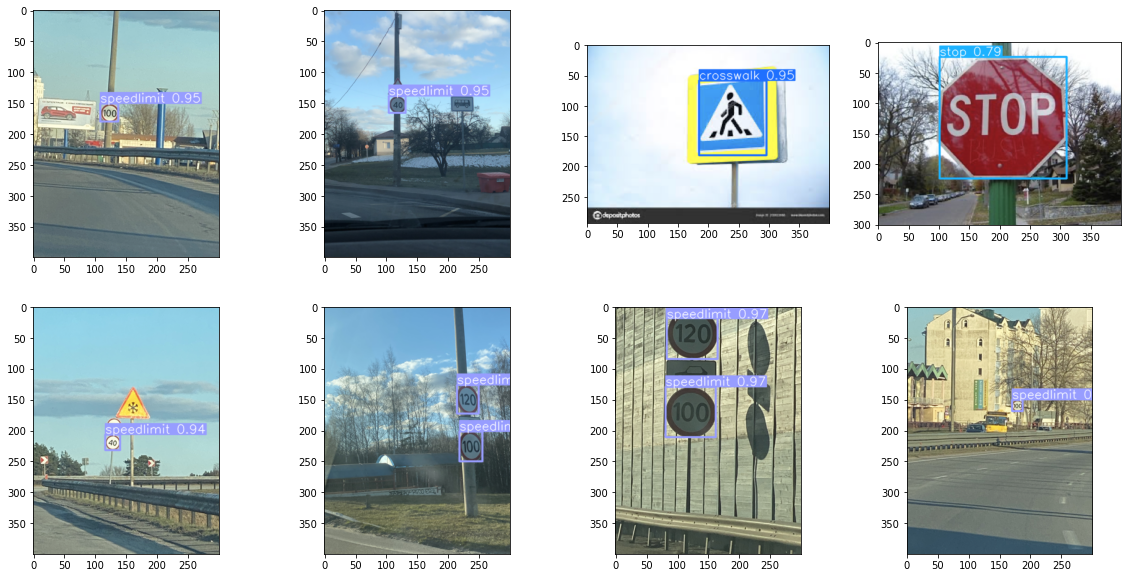

In [105]:
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import os
import itertools
import numpy as np

fig, ax = plt.subplots(2,4, figsize=(20,10))
imgs = os.listdir('./dataset/test/images')

for idx in itertools.product(range(2),range(4)): 
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'./dataset/test/images/{imgname}')
    results = model(img)
    ax[idx[0],idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))